# Understanding Capitalism and Communism from the mouths of philosophers

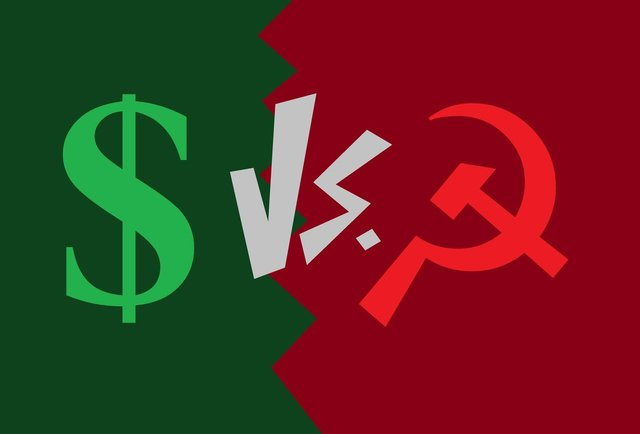

This report is a guidebook with selected Q&A aims at giving out an overview of Capitalism and Communism.



Introduction

For the people who don't know anything about economics and politics, Capitalism and Communism are just two obscure terminologies. I conduct data mining and visualization for their characteristics through philosophy data and compare them to infer about their history, core values and relationship.

In [1]:
import numpy as np
import pandas as pd
import time
import random
import re

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

# Sentiment modeling
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
#nltk.download('vader_lexicon')

In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
file = drive.CreateFile({'id':'1CDIosEq5u-3Q--aMe91KM110F5ZyHfk-'})
file.GetContentFile('philosophy_data.csv')  
#https://drive.google.com/file/d/1CDIosEq5u-3Q--aMe91KM110F5ZyHfk-/view?usp=share_link

In [4]:
df = pd.read_csv('philosophy_data.csv',error_bad_lines=False)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [6]:
print(df.isnull().sum())

title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
dtype: int64


In [7]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} cols with no missing value.")

This dataset has 360808 rows and 11 cols with no missing value.


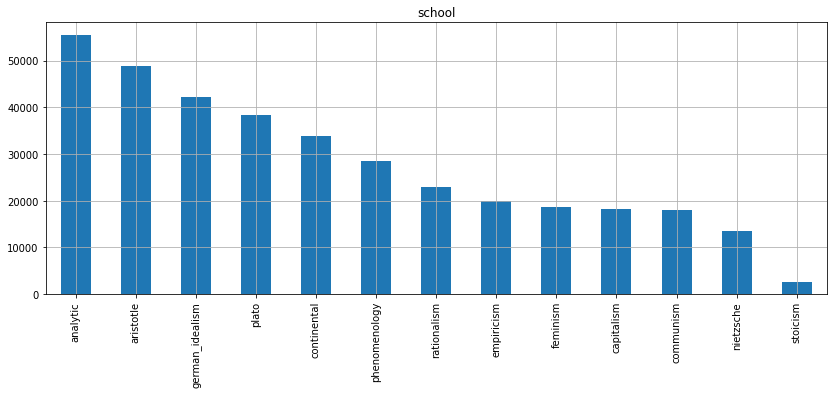

In [8]:
plt.figure(figsize=(14,5))
df['school'].value_counts().plot(kind='bar')
plt.title('school')
plt.grid()
plt.show()

- The dataset is from https://www.kaggle.com/datasets/kouroshalizadeh/history-of-philosophy/code.

- There is no missing value in the dataset, and the number of observations for schools of Capitalism and Communism is roughly the same, which is good for analyzing and modeling.

- I use a subset of this dataset which only contains schools of Capitalism and Communism to conduct data analysis in this report.

## Q1. What are the characteristics of Capitalism and Communism in this philosophy dataset?

First of all, let's take a dive into the dataset to see how the philosophy data for Capitalism and Communism looks like.

In [9]:
df_sub = df.loc[df['school'].isin(['capitalism','communism'])]

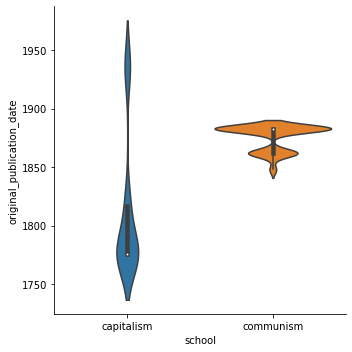

In [10]:
sns.catplot(data=df_sub.sample(500), kind="violin", x="school", y="original_publication_date")

From the violin plot of original_publication_date we can see that the time span of publication date of Capitalism is larger than Communism, from 18th century to 20th century, while the publication date related to Communism is more focused in 19th century.

These informations tell us that Capitalism is relatively an earlier concept that emerged before 18th century and philosophers keep studying it for over 200 years. On the other hand, Communism is a relatively new concept, but much attention was drawn to it in the 19th century so the number of publication is large at that time.



In [11]:
capitalism = df.school=="capitalism"
df_cap = df.loc[capitalism]
communism = df.school=="communism"
df_com = df.loc[communism]

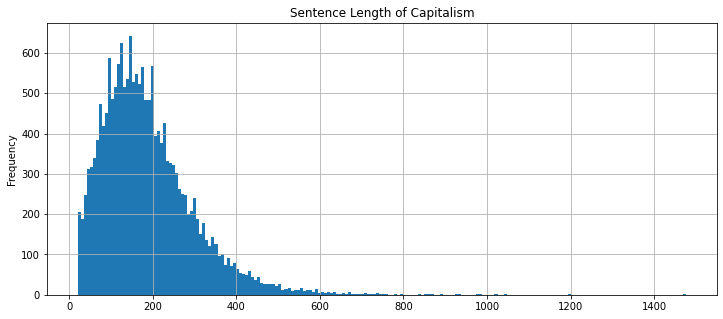

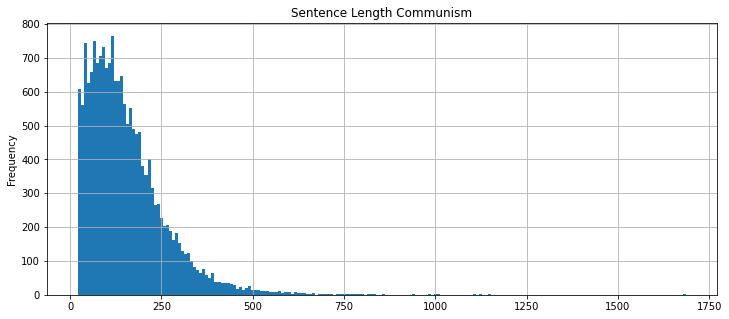

In [12]:
plt.figure(figsize=(12,5))
df_cap.sentence_length.plot(kind='hist', bins=200)
plt.title('Sentence Length of Capitalism')
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
df_com.sentence_length.plot(kind='hist', bins=200)
plt.title('Sentence Length Communism')
plt.grid()
plt.show()

From the histgram above we can see that the average and the variation of sentence length for Capitalism is larger than Communism.

<ipython-input-18-ffba736c55e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['tokens_num'] = list(map(len,map(eval,df_sub.tokenized_txt)))


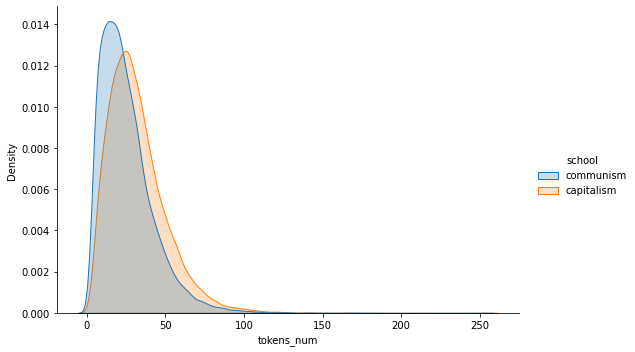

In [18]:
df_sub['tokens_num'] = list(map(len,map(eval,df_sub.tokenized_txt)))
sns.displot(df_sub,x="tokens_num",hue="school",kind="kde",fill=True,aspect=1.5)

Despite of sentence length, I also care about the token numbers for these two different schools because it related to the amount of information contained in a sentence. This kdeplot shows that the number of tokens for Capitalism is more disperse distributed than Communism, and its mean value is larger.

## Q2. What do Capitalism and Communism care about?

To answer the questions of "What is Capitalism and Communism?" and "What is the difference and connection between them?", I draw wordcloud plot to distinguish the high-frequency words, and build Latent Dirichlet Analysis (LDA) model to identify latent topics and keywords of each observation for clustering.

In [19]:
def show_wordcloud(df):
  stopwords = set(STOPWORDS)
  schools = ['capitalism','communism']
  for sc in schools:
      df_temp = df[df.school==sc]
      
      print('School = ', sc.upper(), ':')
      
      # render wordcloud
      text = " ".join(txt for txt in df_temp.sentence_lowered)
      wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=200,
                            width = 500, height = 300,
                            background_color="white").generate(text)
      plt.figure(figsize=(12,8))
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()

School =  CAPITALISM :


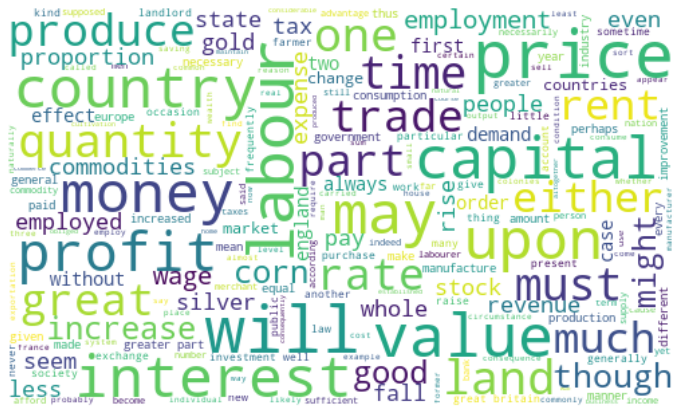

School =  COMMUNISM :


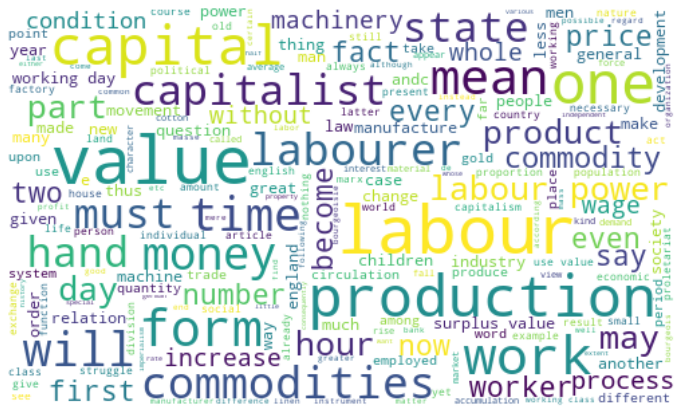

In [20]:
show_wordcloud(df_sub)

From the wordcloud plot for two schools, we can initially tell the difference among Capitalism and Communism.

- CAPITALISM : Capital, Profit, Interest, Price
- COMMUNISM : Labour, Machine, Commodities, Production

Capitalism contains more words that related to different ways for earning money, most of them are terminologies in capital market and investment. Meanwhile, Communism mainly focus on prodution itself, which are the elements of the process of working and producing.

Moreover, I notice Communism also contains some words related to Capitalism, like "Capitalist" and "Capital", etc. So it is necessary to further discover the relationship between them.

In [21]:
# print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

In [22]:
def words_importance_rank(data):
  tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                  min_df=0.01, stop_words='english',
                  use_idf=True, ngram_range=(1,1))
  tfidf_matrix = tfidf_model.fit_transform(data.tokenized_txt) #fit the vectorizer to synopses

  lda = LatentDirichletAllocation(n_components=5,random_state=100)
  lda_output = lda.fit_transform(tfidf_matrix)
  topic_word = lda.components_

  topic_names = ["Topic" + str(i) for i in range(lda.n_components)]
  doc_names = ["Doc" + str(i) for i in range(len(data))]
  df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)
  topic = np.argmax(df_document_topic.values, axis=1)
  df_document_topic['topic'] = topic
  df_topic_words = pd.DataFrame(lda.components_)
  df_topic_words.columns = tfidf_model.get_feature_names()
  df_topic_words.index = topic_names
  topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=10)        
  df_topic_words = pd.DataFrame(topic_keywords)
  df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
  df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
  return df_topic_words

In [29]:
words_importance_rank(df_cap)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,percent,value,gold,silver,england,quantity,money,bank,france,country
Topic 1,great,trade,people,countries,years,country,foreign,little,europe,common
Topic 2,tax,rent,land,revenue,expense,taxes,produce,year,pay,different
Topic 3,price,money,wages,corn,market,rise,commodities,demand,case,natural
Topic 4,capital,employment,labour,rate,investment,increase,employed,income,produce,value


Both the subset of Capitalism and Communism data are clustered into 5 topics.

This table shows the ten most important words in each topic of Capitalism. For the five topics listed above, we can somehow piece together the fragmented keywords into sentences, and further gain the core contents of Capitalism.

Topics in Capitalism:

- Topic 0: financial activities of gold and silver in banks of different country like England and France.

- Topic 1: trade to foreign counties

- Topic 2: revenue from tax and rent of land

- Topic 3: price of commodities in market related to demand 

- Topic 4: capital and investment interact with employment

Capitalism mainly cares about making money through different financial activities, and they have some research on the factors that influence the market.

In [24]:
words_importance_rank(df_com)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,value,money,form,commodities,labour,commodity,use,process,different,material
Topic 1,class,great,political,work,trade,andc,social,people,movement,england
Topic 2,day,factory,children,hours,working,men,number,work,fact,question
Topic 3,capital,production,state,new,capitalist,industry,means,bourgeois,machine,like
Topic 4,labour,power,surplus,time,value,wages,capital,labourers,man,labourer


Topics in Communism:

- Topic 0: value of commodities varies for different materials and production processes

- Topic 1: political movement about work or trade in England

- Topic 2: men's working hours per day in factory

- Topic 3: bourgeois in industry of capital market

- Topic 4: capital gains from surplus labour value


We can infer that the underlying logic of Communism is to produce more commodity using less working time to supply the needs of the society. Capitalism plays an role of employer who gains money from labor. Additionally, Communism gain money from their product, while Capitalism has other ways to gain money (invest money to the market and make money).

## Q3. Capitalism and Communism, which one is more realizable?

To answer question, I conduct sentiment analysis to see what are the attitudes and emotions when two schools of philosophers describing Capitalism and Communism respectively. Generally speaking, an idea that is easier to achieve will lead to higher expectations and people are more positive when describing it.

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def SentimentAnlysis(sentence):
    sentAnalyzer = SentimentIntensityAnalyzer() 
    sentDict = sentAnalyzer.polarity_scores(sentence)
    
    if sentDict['compound'] >= 0.05:
      return "positive"
    elif sentDict['compound'] <= -0.05 :
      return "negative"
    else:
      return "neutral"

# Main Function
def Pie_plot(df): 
    #making a Corpus and finding sentiments
    corpus = ''
    numPostives = 0
    numNegatives = 0
    numNeutrals = 0
    
    for mem in df['sentence_lowered']:
        corpus += mem
    
    for i in range (len(df)):
        sent = (SentimentAnlysis(df['sentence_lowered'].iloc[i]))
        if sent == "positive":
            numPostives += 1
        elif sent == "negative":
            numNegatives += 1
        else:
            numNeutrals += 1
    
    plt.figure(figsize = (7, 7))
    plt.pie([numPostives, numNegatives, numNeutrals], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%')
    if df.school.iloc[0]== "communism":
      plt.title('Sentiment Analysis for Communism')
    else:
      plt.title('Sentiment Analysis for Capitalism')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


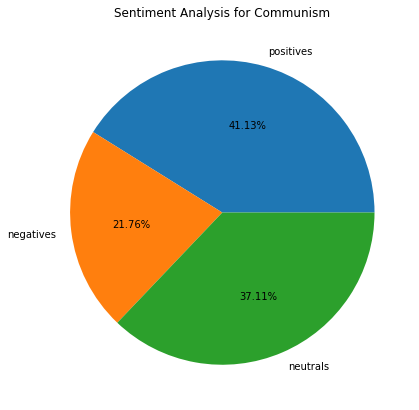

In [27]:
import nltk
nltk.download('vader_lexicon')
Pie_plot(df_com)

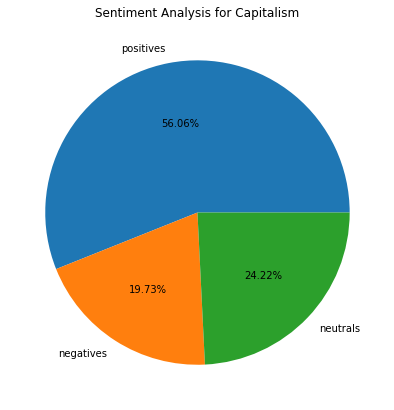

In [28]:
Pie_plot(df_cap)

From two pie plots above we can see that Capitalism part contains more positive sentences than Communism, and neutral illustration takes a large share when it comes to Communism.

This result makes sense according to the analysis above. Capitalism describes something more concrete and is directly linked to money or people's interests, so the related sentences are probably more positive. Communism contains many topics related to work and production, which consumes physical and mental energy, so the description is reasonably less possitive than the money related topic.

This result also matchs the reality. Capitalism is a political system practiced by most countries in the world, and most developed countries have reached their current status through the practice of Capitalism.

On the other hand, Communism is much more demanding in terms of productivity and has not been fully realized in any country so far, it is reasonable that Communism just exists as some theoretical and definitional terms in philosophy without emotion. That's explains why there is a large percentage of neutral emotion in text data for Communism. Moreover, considering that Communism may not be realized in the short term, it aims to maximize the productifity that is enough to feed everybody's need, so it is a very utopian and wonderful thing, too wonderful, so phylosopher's emotions and evaluations of it could be polarized, full of expectation and rational criticism as well, which is why the positive and negative parts of the pie chart have about the relatively same weight.


## Conclusions

1. The term capitalism appeared earlier than Communism, and the philosopher's description of Capitalism contains more information in a single sentence.
2. Capitalism focus on earning money, Communism focus on maximizing productivity. Their values are different, but they are related to each other.
3. Capitalism is more realizable than Communism.

In [31]:
df_sub.to_csv('df_sub.csv')

In [32]:
df_com.to_csv('df_com.csv')

In [33]:
df_cap.to_csv('df_cap.csv')